# Hessian Matrix

In [27]:
import pandas as pd
import numpy as np
import re
from sympy import *
import math

In [6]:
# Showing how to extract symbols, it's always in alphabetical order
x, y, z = symbols('x, y, z')
multivar_exp = eval('z + y + x')
print(multivar_exp.free_symbols)

one, two, three = symbols('x_1 x_2 x_3')
multivar_exp = eval('three + two + one')
print('Free symbols:', multivar_exp.free_symbols)

# Showing how indices are rendered
print('Rendering the expression:', multivar_exp)

{z, x, y}
Free symbols: {x_2, x_3, x_1}
Rendering the expression: x_1 + x_2 + x_3


In [7]:
# Fixing ugly printing
init_printing()
display('Pretty rendering with display():', multivar_exp)

'Pretty rendering with display():'

' with (-4, -2):'

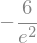

In [34]:
def evaluate_value(func, point):
    """
    Takes point tuple for evaluation, with variables in alphabetical order.
    fails if all symbols aren't mapped, returns numerical evaluation
    """
    symbol_list = [Symbol('x'), Symbol('y')]
    symbol_list.sort(key=str)
    if len(symbol_list) != len(point):
        print(symbol_list)
        print(point)
        raise ValueError('Unmatched argument sizes')
    result = func.copy()
    for symbol, value in zip(symbol_list, point):
        result = result.replace(symbol, value)
    return result

x = Symbol('x')
y = Symbol('y')
example_func = eval('exp(x-y)*(x**2-2*y**2+4*x+2)')
display(example_func, ' with (-4, -2):')
display(evaluate_value(example_func, (-4, -2)))
        

In [52]:
def gradient(func):
    """ Returns list of derivatives for each free symbol (in alphabetical order) """
    symbol_list = [Symbol('x'), Symbol('y')]
    symbol_list.sort(key=str)
    partial_derivatives = []
    for symbol in symbol_list:
        partial_derivatives.append(diff(func, symbol))
    return partial_derivatives

x1, x2 = symbols('x y')
example_func = eval('exp(x-y)*(x**2-2*y**2)')
print('Gradient example using:')
display(example_func)
print('All partial derivatives:')
display(gradient(example_func))

Gradient example using:


All partial derivatives:


In [54]:
def calcul_hessian_matrix(func):
    """
    Calculate the hessian matrix of the function.
    """
    partial_derivates = gradient(func)
    partial_derivates_second = []
    
    for derivate in partial_derivates:
        partial_derivates_second.append(factor(gradient(derivate)))
    hessian_matrix = Matrix(partial_derivates_second)
    return hessian_matrix

In [55]:
def calculate_determinate(func,point):
    """
    Calculate the determinant based on the hessian matrix of the function.
    """
    return evaluate_value(calcul_hessian_matrix(func), point).det()

In [56]:
def calculate_trace(func, point):
    """
    Calculate the trace based on the hessian matrix of the function.
    """
    hessian = calcul_hessian_matrix(func)
    eigenvals = evaluate_value(hessian,point).eigenvals()
    trace = sum([k*v for k, v in eigenvals.items()])
    return trace.simplify()

In [62]:
def is_critical_point(func, point):
    
    hessian = calcul_hessian_matrix(func)
    
    if calculate_determinate(func, point) > 0:
        trace = calculate_trace(func, point)
        if trace > 0 :
            return 'The function has a minimum.'
        elif trace < 0:
            return  'The function has a maximum.'
    return 'The function has no minimum or maximum.'

In [63]:
x = Symbol('x')
y = Symbol('y')
example_func_1 = eval('exp(x-y)*(x**2-2*y**2)')
example_func_2 = eval('x**2-cos(y)')
print('Gradient example using:')
display(example_func_1)
display(example_func_2)

is_critical_point(example_func_1, (-4,-2))
is_critical_point(example_func_2, (0,math.pi))

Gradient example using:


'The function has no minimum or maximum.'